In [1]:

#############################################################################
# Import Packages
#############################################################################

#package imports
import pandas as pd # data science essentials
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # enhanced data visualization
import random as rand # random number generation
import numpy as np # numpy array
import sklearn.linear_model as lm
import sklearn.ensemble as e
import sklearn.metrics # more metrics for model performance evaluation
import statsmodels.formula.api as smf # regression modeling

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split # train/test split
from sklearn.neighbors import KNeighborsRegressor # KNN for Regression
from sklearn.preprocessing import StandardScaler # standard scaleR
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix as cm
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV



# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


##############################################################################
# Load Data
##############################################################################

original_df = pd.read_excel('Apprentice_Chef_Dataset.xlsx')
original_df.shape

(1946, 29)

In [2]:
#############################################################################
# Outlier Analysis
#############################################################################

#drop out binary and categorical variables
df_test=original_df.drop(['NAME','FIRST_NAME',
                          'FAMILY_NAME'],
                          axis=1)
"""
#ploting the histograms
for i in df_test:
   
    plt.hist(original_df[i])
    plt.xlabel(i)
    plt.tight_layout()
    plt.show()

After checking the outliers, I found  the outliers.
"""    

'\n#ploting the histograms\nfor i in df_test:\n   \n    plt.hist(original_df[i])\n    plt.xlabel(i)\n    plt.tight_layout()\n    plt.show()\n\nAfter checking the outliers, I found oot the outliers.\n'

In [3]:
# setting outlier thresholds after ploting histograms
TOTAL_MEALS_ORDERED_hi = 220
UNIQUE_MEALS_PURCH_hi = 9
CONTACTS_W_CUSTOMER_SERVICE_hi  = 11
AVG_TIME_PER_SITE_VISIT_hi = 220
CANCELLATIONS_BEFORE_NOON_hi= 8
CANCELLATIONS_AFTER_NOON_hi= 2
EARLY_DELIVERIES_hi=8
EARLY_DELIVERIES_lo=1
LATE_DELIVERIES_hi= 12
AVG_PREP_VID_TIME_hi = 400 
MASTER_CLASSES_ATTENDED_hi= 3
AVG_CLICKS_PER_VISIT_lo= 7
TOTAL_PHOTOS_VIEWED_hi=800
TOTAL_PHOTOS_VIEWED_lo=100
MOBILE_LOGINS_hi = 7
MOBILE_LOGINS_lo = 4
PC_LOGINS_hi = 2.5
LARGEST_ORDER_SIZE_hi= 8
LARGEST_ORDER_SIZE_lo= 1
MEDIAN_MEAL_RATING_hi = 5
REVENUE_hi=5000

PRODUCT_CATEGORIES_VIEWED_hi=10
WEEKLY_PLAN_hi=15

In [4]:
#########################################################################
## Feature Engineering (outlier thresholds)                     ##
#########################################################################

# developing columns for outliers

# REVENUE
df_test['out_REVENUE'] = 0
variable_hi = df_test.loc[0:,'out_REVENUE'][df_test['REVENUE'] > REVENUE_hi]

df_test['out_REVENUE'].replace(to_replace = variable_hi,
                                value      = 1,
                                inplace    = True)

#PRODUCT_CATEGORIES_VIEWED
df_test['out_PRODUCT_CATEGORIES_VIEWED'] = 0
variable_hi = df_test.loc[0:,'out_PRODUCT_CATEGORIES_VIEWED'][df_test['PRODUCT_CATEGORIES_VIEWED'] > PRODUCT_CATEGORIES_VIEWED_hi]

df_test['out_PRODUCT_CATEGORIES_VIEWED'].replace(to_replace = variable_hi,
                                value      = 1,
                                inplace    = True)

#WEEKLY_PLAN
df_test['out_WEEKLY_PLAN'] = 0
variable_hi = df_test.loc[0:,'out_WEEKLY_PLAN'][df_test['WEEKLY_PLAN'] > WEEKLY_PLAN_hi]

df_test['out_WEEKLY_PLAN'].replace(to_replace = variable_hi,
                                value      = 1,
                                inplace    = True)


# TOTAL_MEALS_ORDERED
df_test['out_TOTAL_MEALS_ORDERED'] = 0
variable_hi = df_test.loc[0:,'out_TOTAL_MEALS_ORDERED'][df_test['TOTAL_MEALS_ORDERED'] > TOTAL_MEALS_ORDERED_hi]

df_test['out_TOTAL_MEALS_ORDERED'].replace(to_replace = variable_hi,
                                value      = 1,
                                inplace    = True)

# UNIQUE_MEALS_PURCH
df_test['out_UNIQUE_MEALS_PURCH'] = 0
variable_hi = df_test.loc[0:,'out_UNIQUE_MEALS_PURCH'][df_test['UNIQUE_MEALS_PURCH'] > UNIQUE_MEALS_PURCH_hi]

df_test['out_UNIQUE_MEALS_PURCH'].replace(to_replace = variable_hi,
                                value      = 1,
                                inplace    = True)


# CONTACTS_W_CUSTOMER_SERVICE
df_test['out_CONTACTS_W_CUSTOMER_SERVICE'] = 0
variable_hi = df_test.loc[0:,'out_CONTACTS_W_CUSTOMER_SERVICE'][df_test['CONTACTS_W_CUSTOMER_SERVICE'] > CONTACTS_W_CUSTOMER_SERVICE_hi]

df_test['out_CONTACTS_W_CUSTOMER_SERVICE'].replace(to_replace = variable_hi,
                                value      = 1,
                                inplace    = True)

# AVG_TIME_PER_SITE_VISIT
df_test['out_AVG_TIME_PER_SITE_VISIT'] = 0
variable_hi = df_test.loc[0:,'out_AVG_TIME_PER_SITE_VISIT'][df_test['AVG_TIME_PER_SITE_VISIT'] > AVG_TIME_PER_SITE_VISIT_hi]

df_test['out_AVG_TIME_PER_SITE_VISIT'].replace(to_replace = variable_hi,
                                value      = 1,
                                inplace    = True)
# CANCELLATIONS_BEFORE_NOON
df_test['out_CANCELLATIONS_BEFORE_NOON'] = 0
variable_hi = df_test.loc[0:,'out_CANCELLATIONS_BEFORE_NOON'][df_test['CANCELLATIONS_BEFORE_NOON'] > CANCELLATIONS_BEFORE_NOON_hi]

df_test['out_CANCELLATIONS_BEFORE_NOON'].replace(to_replace = variable_hi,
                                value      = 1,
                                inplace    = True)

# CANCELLATIONS_AFTER_NOON
df_test['out_CANCELLATIONS_AFTER_NOON'] = 0
variable_hi = df_test.loc[0:,'out_CANCELLATIONS_AFTER_NOON'][df_test['CANCELLATIONS_AFTER_NOON'] > CANCELLATIONS_AFTER_NOON_hi]

df_test['out_CANCELLATIONS_AFTER_NOON'].replace(to_replace = variable_hi,
                                value      = 1,
                                inplace    = True)

# EARLY_DELIVERIES
df_test['out_EARLY_DELIVERIES'] = 0
variable_lo = df_test.loc[0:,'out_EARLY_DELIVERIES'][df_test['EARLY_DELIVERIES'] < EARLY_DELIVERIES_lo]

df_test['out_EARLY_DELIVERIES'].replace(to_replace = variable_lo,
                                value      = 1,
                                inplace    = True)


# LATE_DELIVERIES
df_test['out_LATE_DELIVERIES'] = 0
variable_hi = df_test.loc[0:,'out_LATE_DELIVERIES'][df_test['LATE_DELIVERIES'] > LATE_DELIVERIES_hi]

df_test['out_LATE_DELIVERIES'].replace(to_replace = variable_hi,
                                value      = 1,
                                inplace    = True)

# AVG_PREP_VID_TIME
df_test['out_AVG_PREP_VID_TIME'] = 0
variable_hi = df_test.loc[0:,'out_AVG_PREP_VID_TIME'][df_test['AVG_PREP_VID_TIME'] > AVG_PREP_VID_TIME_hi]

df_test['out_AVG_PREP_VID_TIME'].replace(to_replace = variable_hi,
                                value      = 1,
                                inplace    = True)

# MASTER_CLASSES_ATTENDED
df_test['out_MASTER_CLASSES_ATTENDED'] = 0
variable_hi = df_test.loc[0:,'out_MASTER_CLASSES_ATTENDED'][df_test['MASTER_CLASSES_ATTENDED'] > MASTER_CLASSES_ATTENDED_hi]

df_test['out_MASTER_CLASSES_ATTENDED'].replace(to_replace = variable_hi,
                                value      = 1,
                                inplace    = True)

# AVG_CLICKS_PER_VISIT
df_test['out_AVG_CLICKS_PER_VISIT'] = 0
variable_lo = df_test.loc[0:,'out_AVG_CLICKS_PER_VISIT'][df_test['AVG_CLICKS_PER_VISIT'] < AVG_CLICKS_PER_VISIT_lo]

df_test['out_AVG_CLICKS_PER_VISIT'].replace(to_replace = variable_lo,
                                value      = 1,
                                inplace    = True)


#TOTAL_PHOTOS_VIEWED
df_test['out_TOTAL_PHOTOS_VIEWED'] = 0
variable_hi = df_test.loc[0:,'out_TOTAL_PHOTOS_VIEWED'][df_test['TOTAL_PHOTOS_VIEWED'] > TOTAL_PHOTOS_VIEWED_hi]
variable_lo = df_test.loc[0:,'out_TOTAL_PHOTOS_VIEWED'][df_test['TOTAL_PHOTOS_VIEWED'] < TOTAL_PHOTOS_VIEWED_lo]

df_test['out_TOTAL_PHOTOS_VIEWED'].replace(to_replace = variable_hi,
                                value      = 1,
                                inplace    = True)
df_test['out_TOTAL_PHOTOS_VIEWED'].replace(to_replace = variable_lo,
                                value      = 1,
                                inplace    = True)

#MOBILE_LOGINS
df_test['out_MOBILE_LOGINS'] = 0
variable_hi = df_test.loc[0:,'out_MOBILE_LOGINS'][df_test['MOBILE_LOGINS'] > MOBILE_LOGINS_hi]
variable_lo = df_test.loc[0:,'out_MOBILE_LOGINS'][df_test['MOBILE_LOGINS'] < MOBILE_LOGINS_lo]

df_test['out_MOBILE_LOGINS'].replace(to_replace = variable_hi,
                                value      = 1,
                                inplace    = True)
df_test['out_MOBILE_LOGINS'].replace(to_replace = variable_lo,
                                value      = 1,
                                inplace    = True)
#LARGEST_ORDER_SIZE
df_test['out_LARGEST_ORDER_SIZE'] = 0
variable_hi = df_test.loc[0:,'out_LARGEST_ORDER_SIZE'][df_test['LARGEST_ORDER_SIZE'] > LARGEST_ORDER_SIZE_hi]
variable_lo = df_test.loc[0:,'out_LARGEST_ORDER_SIZE'][df_test['LARGEST_ORDER_SIZE'] < LARGEST_ORDER_SIZE_lo]

df_test['out_LARGEST_ORDER_SIZE'].replace(to_replace = variable_hi,
                                value      = 1,
                                inplace    = True)
df_test['out_LARGEST_ORDER_SIZE'].replace(to_replace = variable_lo,
                                value      = 1,
                                inplace    = True)
# PC_LOGINS
df_test['out_PC_LOGINS'] = 0
variable_hi = df_test.loc[0:,'out_PC_LOGINS'][df_test['PC_LOGINS'] > PC_LOGINS_hi]

df_test['out_PC_LOGINS'].replace(to_replace = variable_hi,
                                value      = 1,
                                inplace    = True)
# EARLY_DELIVERIES
df_test['out_EARLY_DELIVERIES'] = 0
variable_hi = df_test.loc[0:,'out_EARLY_DELIVERIES'][df_test['EARLY_DELIVERIES'] > EARLY_DELIVERIES_hi]

df_test['out_EARLY_DELIVERIES'].replace(to_replace = variable_hi,
                                value      = 1,
                                inplace    = True)
# MEDIAN_MEAL_RATING
df_test['out_MEDIAN_MEAL_RATING'] = 0
variable_hi = df_test.loc[0:,'out_MEDIAN_MEAL_RATING'][df_test['MEDIAN_MEAL_RATING'] > MEDIAN_MEAL_RATING_hi]

df_test['out_MEDIAN_MEAL_RATING'].replace(to_replace = variable_hi,
                                value      = 1,
                                inplace    = True)


In [6]:
#EMAIL ANAYLSIS

# placeholder list
placeholder_lst = []

# looping through each email address
for index, col in df_test.iterrows():
    
    # splitting email domain at '@'
    split_email = df_test.loc[index, 'EMAIL'].split(sep = '@')
    
    # appending placeholder_lst with the results
    placeholder_lst.append(split_email)
    

# converting placeholder_lst into a DF 
email_df = pd.DataFrame(placeholder_lst)


# renaming column to concatenate with the DF
email_df.columns = ['0' , 'email_domain']


# concatenating personal_email_domain with DataFrame
df_test = pd.concat([df_test, email_df['email_domain']],
                     axis = 1)


# printing value counts of personal_email_domain
df_test.loc[: ,'email_domain'].value_counts()

gmail.com           303
protonmail.com      284
yahoo.com           274
msn.com              72
aol.com              69
passport.com         64
hotmail.com          63
live.com             62
me.com               59
amex.com             30
merck.com            28
jnj.com              28
mcdonalds.com        28
cocacola.com         28
nike.com             27
apple.com            27
dupont.com           26
ge.org               26
ibm.com              26
chevron.com          25
microsoft.com        25
travelers.com        24
unitedhealth.com     24
exxon.com            24
boeing.com           23
caterpillar.com      22
mmm.com              22
verizon.com          22
pg.com               22
disney.com           21
walmart.com          21
pfizer.com           20
visa.com             20
jpmorgan.com         19
goldmansacs.com      18
cisco.com            18
unitedtech.com       18
homedepot.com        17
intel.com            17
Name: email_domain, dtype: int64

In [7]:
# Grouping the 3 different types of emails in the dataset
professional_d = ['@mmm.com','@amex.com','@apple.com','@boeing.com','@caterpillar.com','@chevron.com','@cisco.com','@cocacola.com','@disney.com','@dupont.com','@exxon.com','@ge.org.com','@goldmansacs.com','@homedepot.com','@ibm.com','@intel.com','@jnj.com','@jpmorgan.com','@mcdonalds.com','@merck.com','@microsoft.com','@nike.com','@pfizer.com','@pg.com','@travelers.com','@unitedtech.com','@unitedhealth.com','@verizon.com','@visa.com','@walmart.com']
personal_d  = ['@gmail.com','@yahoo.com','@protonmail.com']
junk_d = ['@me.com','@aol.com','@hotmail.com','@live.com','@msn.com','@passport.com']


# placeholder list
placeholder_lst = []


# looping to group observations by domain type
for domain in df_test['email_domain']:
    
    if '@' + domain in professional_d:
        placeholder_lst.append('PROFESSIONAL_EMAIL')
        

    elif '@' + domain in personal_d:
        placeholder_lst.append('PERSONAL_EMAIL')

    elif '@' + domain in junk_d:
        placeholder_lst.append('JUNK_EMAIL')
        
    else:
        placeholder_lst.append('UNKNOWN_EMAIL')
        

# concatenating with original DataFrame
df_test['domain_group'] = pd.Series(placeholder_lst)

# checking results
df_test['domain_group'].value_counts()

PERSONAL_EMAIL        861
PROFESSIONAL_EMAIL    670
JUNK_EMAIL            389
UNKNOWN_EMAIL          26
Name: domain_group, dtype: int64

In [8]:
# one_hot encoding variables
one_hot_email   = pd.get_dummies(df_test['domain_group'])


# joining codings
df_test = df_test.join([one_hot_email])

# checking results
df_test.columns

Index(['REVENUE', 'CROSS_SELL_SUCCESS', 'EMAIL', 'TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH', 'CONTACTS_W_CUSTOMER_SERVICE', 'PRODUCT_CATEGORIES_VIEWED', 'AVG_TIME_PER_SITE_VISIT', 'MOBILE_NUMBER', 'CANCELLATIONS_BEFORE_NOON', 'CANCELLATIONS_AFTER_NOON', 'TASTES_AND_PREFERENCES', 'MOBILE_LOGINS', 'PC_LOGINS', 'WEEKLY_PLAN', 'EARLY_DELIVERIES', 'LATE_DELIVERIES', 'PACKAGE_LOCKER', 'REFRIGERATED_LOCKER', 'FOLLOWED_RECOMMENDATIONS_PCT', 'AVG_PREP_VID_TIME', 'LARGEST_ORDER_SIZE', 'MASTER_CLASSES_ATTENDED', 'MEDIAN_MEAL_RATING', 'AVG_CLICKS_PER_VISIT', 'TOTAL_PHOTOS_VIEWED', 'out_REVENUE', 'out_PRODUCT_CATEGORIES_VIEWED', 'out_WEEKLY_PLAN', 'out_TOTAL_MEALS_ORDERED', 'out_UNIQUE_MEALS_PURCH', 'out_CONTACTS_W_CUSTOMER_SERVICE', 'out_AVG_TIME_PER_SITE_VISIT', 'out_CANCELLATIONS_BEFORE_NOON', 'out_CANCELLATIONS_AFTER_NOON', 'out_EARLY_DELIVERIES', 'out_LATE_DELIVERIES', 'out_AVG_PREP_VID_TIME', 'out_MASTER_CLASSES_ATTENDED', 'out_AVG_CLICKS_PER_VISIT', 'out_TOTAL_PHOTOS_VIEWED',
       'out_MO

In [9]:
df_test.drop(['EMAIL','email_domain','domain_group'],axis=1,inplace=True)

In [10]:
df_test.head()

,REVENUE,CROSS_SELL_SUCCESS,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,MOBILE_LOGINS,PC_LOGINS,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,FOLLOWED_RECOMMENDATIONS_PCT,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED,out_REVENUE,out_PRODUCT_CATEGORIES_VIEWED,out_WEEKLY_PLAN,out_TOTAL_MEALS_ORDERED,out_UNIQUE_MEALS_PURCH,out_CONTACTS_W_CUSTOMER_SERVICE,out_AVG_TIME_PER_SITE_VISIT,out_CANCELLATIONS_BEFORE_NOON,out_CANCELLATIONS_AFTER_NOON,out_EARLY_DELIVERIES,out_LATE_DELIVERIES,out_AVG_PREP_VID_TIME,out_MASTER_CLASSES_ATTENDED,out_AVG_CLICKS_PER_VISIT,out_TOTAL_PHOTOS_VIEWED,out_MOBILE_LOGINS,out_LARGEST_ORDER_SIZE,out_PC_LOGINS,out_MEDIAN_MEAL_RATING,JUNK_EMAIL,PERSONAL_EMAIL,PROFESSIONAL_EMAIL,UNKNOWN_EMAIL
0,1880.0,1,118,4,7,5,86.00,1,2,1,0,6,2,8,0,2,1,0,90,165.8,6,1,3,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
1,1495.0,1,44,3,6,3,125.60,1,0,1,0,6,1,8,0,4,1,0,90,150.5,4,1,3,13,90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
2,2572.5,1,38,1,5,3,58.00,1,5,0,1,6,2,14,0,0,0,0,80,99.6,3,0,3,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3,1647.0,1,76,3,8,10,45.51,0,3,0,1,6,1,11,5,4,0,0,90,125.0,3,0,3,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
4,1923.0,1,65,3,6,9,106.00,1,1,1,0,6,2,12,0,4,1,0,90,135.3,3,1,3,13,253,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [11]:
############################################################################
# Correlation Analysis
############################################################################

#IT DOESNT MAKE SENSE TO HAVE A HEAT MAP WITH THIS AMOUNT OF VARIABLES

""" 
########################
# Correlation Heatmap
########################

df_test.corr().round(2)

# Using palplot to view a color scheme
sns.palplot(sns.color_palette('coolwarm', 1))
fig, ax = plt.subplots(figsize=(15,15))


sns.heatmap(df_corr,
            cmap = 'coolwarm',
            square = True,
            annot = True,
            linecolor = 'black',
            linewidths = 0.1)
plt.show()
"""

" \n########################\n# Correlation Heatmap\n########################\n\ndf_test.corr().round(2)\n\n# Using palplot to view a color scheme\nsns.palplot(sns.color_palette('coolwarm', 1))\nfig, ax = plt.subplots(figsize=(15,15))\n\n\nsns.heatmap(df_corr,\n            cmap = 'coolwarm',\n            square = True,\n            annot = True,\n            linecolor = 'black',\n            linewidths = 0.1)\nplt.show()\n"

In [11]:
# formatting each explanatory variable for statsmodels
for val in df_test:
    print(f"df_train['{val}'] +")

df_train['REVENUE'] +
df_train['CROSS_SELL_SUCCESS'] +
df_train['TOTAL_MEALS_ORDERED'] +
df_train['UNIQUE_MEALS_PURCH'] +
df_train['CONTACTS_W_CUSTOMER_SERVICE'] +
df_train['PRODUCT_CATEGORIES_VIEWED'] +
df_train['AVG_TIME_PER_SITE_VISIT'] +
df_train['MOBILE_NUMBER'] +
df_train['CANCELLATIONS_BEFORE_NOON'] +
df_train['CANCELLATIONS_AFTER_NOON'] +
df_train['TASTES_AND_PREFERENCES'] +
df_train['MOBILE_LOGINS'] +
df_train['PC_LOGINS'] +
df_train['WEEKLY_PLAN'] +
df_train['EARLY_DELIVERIES'] +
df_train['LATE_DELIVERIES'] +
df_train['PACKAGE_LOCKER'] +
df_train['REFRIGERATED_LOCKER'] +
df_train['FOLLOWED_RECOMMENDATIONS_PCT'] +
df_train['AVG_PREP_VID_TIME'] +
df_train['LARGEST_ORDER_SIZE'] +
df_train['MASTER_CLASSES_ATTENDED'] +
df_train['MEDIAN_MEAL_RATING'] +
df_train['AVG_CLICKS_PER_VISIT'] +
df_train['TOTAL_PHOTOS_VIEWED'] +
df_train['out_REVENUE'] +
df_train['out_PRODUCT_CATEGORIES_VIEWED'] +
df_train['out_WEEKLY_PLAN'] +
df_train['out_TOTAL_MEALS_ORDERED'] +
df_train['out_UNIQUE_MEALS

In [12]:
# declaring explanatory variables
df_data=df_test.drop(['CROSS_SELL_SUCCESS'],axis=1)
df_target= df_test.loc[:,'CROSS_SELL_SUCCESS']
# train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
            df_data,
            df_target,
            test_size = 0.25,
            random_state = 508,
            stratify = df_target)


# merging training data for statsmodels
df_train = pd.concat([X_train, y_train], axis = 1)

In [38]:
df_train.head()

,REVENUE,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,MOBILE_LOGINS,PC_LOGINS,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,FOLLOWED_RECOMMENDATIONS_PCT,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED,out_REVENUE,out_PRODUCT_CATEGORIES_VIEWED,out_WEEKLY_PLAN,out_TOTAL_MEALS_ORDERED,out_UNIQUE_MEALS_PURCH,out_CONTACTS_W_CUSTOMER_SERVICE,out_AVG_TIME_PER_SITE_VISIT,out_CANCELLATIONS_BEFORE_NOON,out_CANCELLATIONS_AFTER_NOON,out_EARLY_DELIVERIES,out_LATE_DELIVERIES,out_AVG_PREP_VID_TIME,out_MASTER_CLASSES_ATTENDED,out_AVG_CLICKS_PER_VISIT,out_TOTAL_PHOTOS_VIEWED,out_MOBILE_LOGINS,out_LARGEST_ORDER_SIZE,out_PC_LOGINS,out_MEDIAN_MEAL_RATING,JUNK_EMAIL,PERSONAL_EMAIL,PROFESSIONAL_EMAIL,UNKNOWN_EMAIL,CROSS_SELL_SUCCESS
179,1880.00,100,5,6,9,80.24,1,4,0,0,6,1,0,0,2,1,1,90,172.4,6,0,3,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1
1307,2441.25,38,1,6,7,51.00,1,0,0,1,6,2,2,0,0,0,0,10,145.6,5,0,2,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
1272,1400.00,73,3,8,3,95.00,1,4,0,1,5,1,2,2,0,0,0,0,171.0,7,0,3,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1
1015,1027.00,15,4,12,1,89.12,1,1,1,1,5,2,0,0,0,0,0,30,117.8,5,0,2,16,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1
961,1321.25,13,1,12,3,228.73,1,0,0,1,6,1,13,0,0,0,0,20,63.0,1,0,1,15,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1


In [13]:
# building a full model

# eliminated some insignificant variables (low correlated) to see the results
logistic_full = smf.logit(formula = """ 
                        CROSS_SELL_SUCCESS ~
                        df_train['REVENUE']+
                        df_train['TOTAL_MEALS_ORDERED'] +
                        df_train['UNIQUE_MEALS_PURCH'] +
                        df_train['CONTACTS_W_CUSTOMER_SERVICE'] +
                       
                        df_train['AVG_TIME_PER_SITE_VISIT'] +
                        df_train['CANCELLATIONS_BEFORE_NOON'] +
                        df_train['CANCELLATIONS_AFTER_NOON'] +
                        df_train['MOBILE_LOGINS'] +
                        
                        df_train['WEEKLY_PLAN'] +
                        df_train['EARLY_DELIVERIES'] +
                        df_train['LATE_DELIVERIES'] +
                        df_train['FOLLOWED_RECOMMENDATIONS_PCT'] +
                        df_train['AVG_PREP_VID_TIME'] +
                        df_train['LARGEST_ORDER_SIZE'] +
                        df_train['MASTER_CLASSES_ATTENDED'] +
                        df_train['MEDIAN_MEAL_RATING'] +
                        df_train['AVG_CLICKS_PER_VISIT'] +
                        df_train['TOTAL_PHOTOS_VIEWED'] +
                        df_train['out_TOTAL_MEALS_ORDERED'] +
                        df_train['out_UNIQUE_MEALS_PURCH'] +
                        df_train['out_CONTACTS_W_CUSTOMER_SERVICE'] +
                        df_train['out_AVG_TIME_PER_SITE_VISIT'] +
                        df_train['out_CANCELLATIONS_BEFORE_NOON'] +
                        df_train['out_CANCELLATIONS_AFTER_NOON'] +
                        df_train['out_LATE_DELIVERIES'] +
                        df_train['out_AVG_PREP_VID_TIME'] +
                        df_train['out_AVG_CLICKS_PER_VISIT'] +
                    
                      
                        df_train['out_LARGEST_ORDER_SIZE'] +
                        
                        df_train['out_REVENUE'] +

                        df_train['out_WEEKLY_PLAN'] +
                        
                        df_train['JUNK_EMAIL'] +
                        df_train['PERSONAL_EMAIL'] +
                        df_train['PROFESSIONAL_EMAIL'] 
                        """,
                                data = df_train)

# telling Python to run the data through the blueprint
results_full = logistic_full.fit()

# printing the results
print(results_full.summary())

         Current function value: 0.435130
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:     CROSS_SELL_SUCCESS   No. Observations:                 1459
Model:                          Logit   Df Residuals:                     1425
Method:                           MLE   Df Model:                           33
Date:                Wed, 05 Feb 2020   Pseudo R-squ.:                  0.3071
Time:                        23:09:22   Log-Likelihood:                -634.85
converged:                      False   LL-Null:                       -916.19
Covariance Type:            nonrobust   LLR p-value:                 1.226e-97
                                                  coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
Intercept                                      -2.5660      1.582     -1.622  

//anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [48]:
# elminating variables with a P-Value higher than 0.05

logistic_full = smf.logit(formula = """ 
                        df_train['CROSS_SELL_SUCCESS'] ~
  
                        df_train['CANCELLATIONS_BEFORE_NOON'] +
                        df_train['CANCELLATIONS_AFTER_NOON'] +
                        df_train['MOBILE_LOGINS'] +
                        df_train['FOLLOWED_RECOMMENDATIONS_PCT'] +
                        df_train['JUNK_EMAIL'] +
                        df_train['PROFESSIONAL_EMAIL']
        
                     
                        """,
                                data = df_train)

# telling Python to run the data through the blueprint
results_full = logistic_full.fit()

# printing the results
print(results_full.summary())

Optimization terminated successfully.
         Current function value: 0.444424
         Iterations 7
                                 Logit Regression Results                                 
Dep. Variable:     df_train['CROSS_SELL_SUCCESS']   No. Observations:                 1459
Model:                                      Logit   Df Residuals:                     1452
Method:                                       MLE   Df Model:                            6
Date:                            Wed, 05 Feb 2020   Pseudo R-squ.:                  0.2923
Time:                                    23:31:00   Log-Likelihood:                -648.41
converged:                                   True   LL-Null:                       -916.19
Covariance Type:                        nonrobust   LLR p-value:                1.831e-112
                                               coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------

In [49]:
# creating a dictionary to store candidate models
candidate_dict = {

 # full model
 'logistic_full'   :                  ['CROSS_SELL_SUCCESS', 
                                            'REVENUE',
                                            'TOTAL_MEALS_ORDERED', 
                                            'UNIQUE_MEALS_PURCH', 
                                            'CONTACTS_W_CUSTOMER_SERVICE', 
                                            'AVG_TIME_PER_SITE_VISIT', 
                                            'CANCELLATIONS_BEFORE_NOON', 
                                            'CANCELLATIONS_AFTER_NOON', 
                                            'MOBILE_LOGINS', 
                                            'WEEKLY_PLAN', 
                                            'EARLY_DELIVERIES', 
                                            'LATE_DELIVERIES', 
                                            'FOLLOWED_RECOMMENDATIONS_PCT', 
                                            'AVG_PREP_VID_TIME', 
                                            'LARGEST_ORDER_SIZE', 
                                            'MASTER_CLASSES_ATTENDED', 
                                            'MEDIAN_MEAL_RATING', 
                                            'AVG_CLICKS_PER_VISIT', 
                                            'TOTAL_PHOTOS_VIEWED', 
                                            'out_TOTAL_MEALS_ORDERED', 
                                            'out_UNIQUE_MEALS_PURCH', 
                                            'out_CONTACTS_W_CUSTOMER_SERVICE', 
                                            'out_AVG_TIME_PER_SITE_VISIT', 
                                            'out_CANCELLATIONS_BEFORE_NOON', 
                                            'out_CANCELLATIONS_AFTER_NOON', 
                                            'out_LATE_DELIVERIES', 
                                            'out_AVG_PREP_VID_TIME', 
                                            'out_AVG_CLICKS_PER_VISIT', 
                                            'out_TOTAL_PHOTOS_VIEWED', 
                                            'out_MOBILE_LOGINS', 
                                            'out_LARGEST_ORDER_SIZE', 
                                            'out_REVENUE', 
                                            'out_WEEKLY_PLAN', 
                                            'JUNK_EMAIL', 
                                            'PERSONAL_EMAIL', 
                                            'PROFESSIONAL_EMAIL'],
 # significant variables only
 'logistic_sig'    :                 [
                                        'CANCELLATIONS_BEFORE_NOON',
                                        'CANCELLATIONS_AFTER_NOON',
                                        'MOBILE_LOGINS',
                                        'FOLLOWED_RECOMMENDATIONS_PCT',
                                        'JUNK_EMAIL',
                                        'PROFESSIONAL_EMAIL'
                                        
                                         ]

                }

In [58]:
#dividing the data in 2 parts (target and features)

df_x=df_test.loc[:,['CANCELLATIONS_BEFORE_NOON',
                                        'CANCELLATIONS_AFTER_NOON',
                                        'MOBILE_LOGINS',
                                        'FOLLOWED_RECOMMENDATIONS_PCT',
                                        'JUNK_EMAIL',
                                        'PROFESSIONAL_EMAIL',
                                        'MOBILE_NUMBER'
                                        
                                        ]]


df_y=df_test.loc[:,'CROSS_SELL_SUCCESS']

## <i> Scikit-learn </i>

In [59]:
# INSTANTIATING StandardScaler()
scaler = StandardScaler()


# FITTING the data
scaler.fit(df_x)


# TRANSFORMING the data
X_scaled     = scaler.transform(df_x)


# converting to a DataFrame
X_scaled_df  = pd.DataFrame(X_scaled) 


# train-test split with the scaled data
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(
            X_scaled_df,
            df_y,
            random_state = 222,
            test_size = 0.25,
            stratify = df_y)

In [66]:
# visual_cm function

def visual_cm(true_y, pred_y, labels = None):
    """
Creates a visualization of a confusion matrix.

PARAMETERS
----------
true_y : true values for the response variable
pred_y : predicted values for the response variable
labels : , default None
    """
    # visualizing the confusion matrix

    # setting labels
    lbls = labels
    

    # declaring a confusion matrix object
    cm = confusion_matrix(y_true = true_y,
                          y_pred = pred_y)


    # heatmap
    sns.heatmap(cm,
                annot       = True,
                xticklabels = lbls,
                yticklabels = lbls,
                cmap        = 'Blues',
                fmt         = 'g')


    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix of the Classifier')
    plt.show()

In [62]:
#Final model before tunning

model_name=['abc']
train_score=[]
test_score=[]
roc_auc=[]
model = e.AdaBoostClassifier()
mod_fit = model.fit(X_train_scaled, y_train_scaled)
y_pred = model.predict(X_test_scaled)
        

train_score.append(model.score(X_train_scaled, y_train_scaled).round(3))
test_score.append(model.score(X_test_scaled, y_test_scaled).round(3))
roc_auc.append(roc_auc_score(y_true = y_test_scaled,
                                     y_score = y_pred).round(4))

model_result = pd.DataFrame(list(zip(model_name,train_score,test_score,roc_auc)),
                           columns=['Model Name','Train Score', 'Test Score','AUC Score'])
print(model_result)

  Model Name  Train Score  Test Score  AUC Score
0        abc        0.807       0.807     0.7868


In [63]:
# Final model that giving the best scores after tunning

model_name=['abc']
train_score=[]
test_score=[]
roc_auc=[]
model = e.AdaBoostClassifier(learning_rate= 0.1, n_estimators= 251)
mod_fit = model.fit(X_train_scaled, y_train_scaled)
y_pred = model.predict(X_test_scaled)
        

train_score.append(model.score(X_train_scaled, y_train_scaled).round(3))
test_score.append(model.score(X_test_scaled, y_test_scaled).round(3))
roc_auc.append(roc_auc_score(y_true = y_test_scaled,
                                     y_score = y_pred).round(4))

model_result = pd.DataFrame(list(zip(model_name,train_score,test_score,roc_auc)),
                           columns=['Model Name','Train Score', 'Test Score','AUC Score'])
print(model_result)

  Model Name  Train Score  Test Score  AUC Score
0        abc        0.807       0.801     0.7891


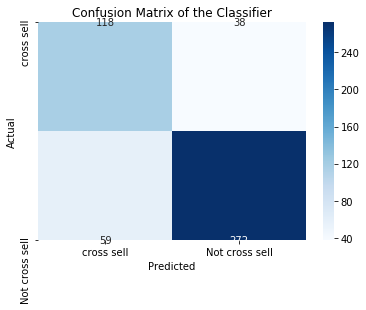

In [64]:
# Calling back the visual_cm function
visual_cm(true_y = y_test_scaled,
          pred_y = y_pred,
          labels = ['cross sell', 'Not cross sell'])

In [79]:
def optimal_neighbors(X_data,
                      y_data,
                      standardize = True,
                      pct_test=0.25,
                      seed=802,
                      response_type='reg',
                      max_neighbors=20,
                      show_viz=True):
    
    if standardize == True:
        # optionally standardizing X_data
        scaler             = StandardScaler()
        scaler.fit(X_data)
        X_scaled           = scaler.transform(X_data)
        X_scaled_df        = pd.DataFrame(X_scaled)
        X_data             = X_scaled_df



    # train-test split
    X_train, X_test, y_train, y_test = train_test_split(X_data,
                                                        y_data,
                                                        test_size = pct_test,
                                                        random_state = seed)


    # creating lists for training set accuracy and test set accuracy
    training_accuracy = []
    test_accuracy = []
    
    
    # setting neighbor range
    neighbors_settings = range(1, max_neighbors + 1)


    for n_neighbors in neighbors_settings:
        # building the model based on response variable type
        if response_type == 'reg':
            clf = KNeighborsRegressor(n_neighbors = n_neighbors)
            clf.fit(X_train, y_train)
            
        elif response_type == 'class':
            clf = KNeighborsClassifier(n_neighbors = n_neighbors)
            clf.fit(X_train, y_train)            
            
        else:
            print("Error: response_type must be 'reg' or 'class'")
        
        
        # recording the training set accuracy
        training_accuracy.append(clf.score(X_train, y_train))
    
        # recording the generalization accuracy
        test_accuracy.append(clf.score(X_test, y_test))


    # optionally displaying visualization
    if show_viz == True:
        # plotting the visualization
        fig, ax = plt.subplots(figsize=(12,8))
        plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
        plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
        plt.ylabel("Accuracy")
        plt.xlabel("n_neighbors")
        plt.legend()
        plt.show()
    
    
    # returning optimal number of neighbors
    print(f"The optimal number of neighbors is: {test_accuracy.index(max(test_accuracy))+1}")
    return test_accuracy.index(max(test_accuracy))+1

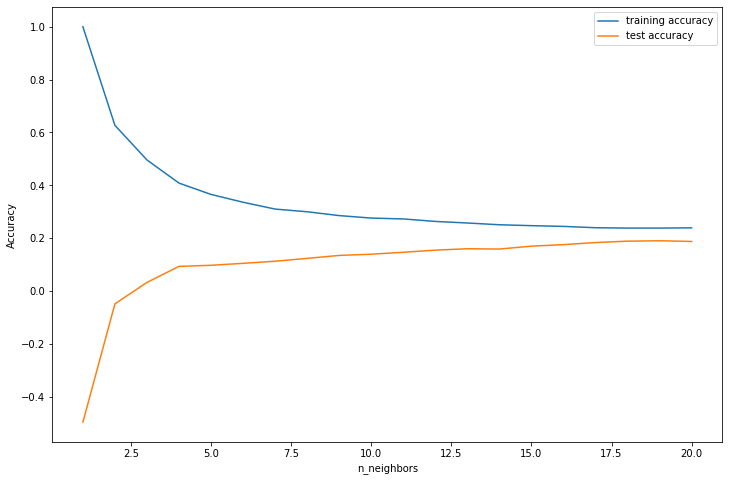

The optimal number of neighbors is: 19


In [80]:
# determining the optimal number of neighbors
opt_neighbors = optimal_neighbors(X_data = X_train,
                                  y_data = y_train)

In [84]:
# creating a confusion matrix
print(confusion_matrix(y_true = y_test,
                       y_pred = logreg_pred))

[[ 72  84]
 [ 79 252]]


In [85]:
# libraries for classification trees
from sklearn.tree import DecisionTreeClassifier      # classification trees
from sklearn.tree import export_graphviz             # exports graphics
from sklearn.externals.six import StringIO           # saves objects in memory
from IPython.display import Image                    # displays on frontend
import pydotplus                                     # interprets dot objects

########################################
# display_tree
########################################
def display_tree(tree, feature_df, height = 500, width = 800):
    """
    PARAMETERS
    ----------
    tree       : fitted tree model object
        fitted CART model to visualized
    feature_df : DataFrame
        DataFrame of explanatory features (used to generate labels)
    height     : int, default 500
        height in pixels to which to constrain image in html
    width      : int, default 800
        width in pixels to which to constrain image in html
    """

    # visualizing the tree
    dot_data = StringIO()

    
    # exporting tree to graphviz
    export_graphviz(decision_tree      = tree,
                    out_file           = dot_data,
                    filled             = True,
                    rounded            = True,
                    special_characters = True,
                    feature_names      = feature_df.columns)


    # declaring a graph object
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())


    # creating image
    img = Image(graph.create_png(),
                height = height,
                width  = width)
    
    return img

########################################
# plot_feature_importances
########################################
def plot_feature_importances(model, train, export = False):
    """
    Plots the importance of features from a CART model.
    
    PARAMETERS
    ----------
    model  : CART model
    train  : explanatory variable training data
    export : whether or not to export as a .png image, default False
    """
    
    # declaring the number
    n_features = X_train.shape[1]
    
    # setting plot window
    fig, ax = plt.subplots(figsize=(12,9))
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(pd.np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    if export == True:
        plt.savefig('Tree_Leaf_50_Feature_Importance.png')

In [86]:
# INSTANTIATING a classification tree object
full_tree = DecisionTreeClassifier()


# FITTING the training data
full_tree_fit = full_tree.fit(X_train, y_train)


# PREDICTING on new data
full_tree_pred = full_tree_fit.predict(X_test)


# SCORING the model
print('Training ACCURACY:', full_tree_fit.score(X_train, y_train).round(4))
print('Testing  ACCURACY:', full_tree_fit.score(X_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = full_tree_pred).round(4))

Training ACCURACY: 1.0
Testing  ACCURACY: 0.694
AUC Score        : 0.6309


In [87]:
# INSTANTIATING a classification tree object
tree_pruned      = DecisionTreeClassifier(max_depth = 4,
                                          min_samples_leaf = 25,
                                          random_state = 222)


# FITTING the training data
tree_pruned_fit  = tree_pruned.fit(X_train, y_train)


# PREDICTING on new data
tree_pred = tree_pruned_fit.predict(X_test)


# SCORING the model
print('Training ACCURACY:', tree_pruned_fit.score(X_train, y_train).round(4))
print('Testing  ACCURACY:', tree_pruned_fit.score(X_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = tree_pred).round(4))

Training ACCURACY: 0.8019
Testing  ACCURACY: 0.7741
AUC Score        : 0.7542


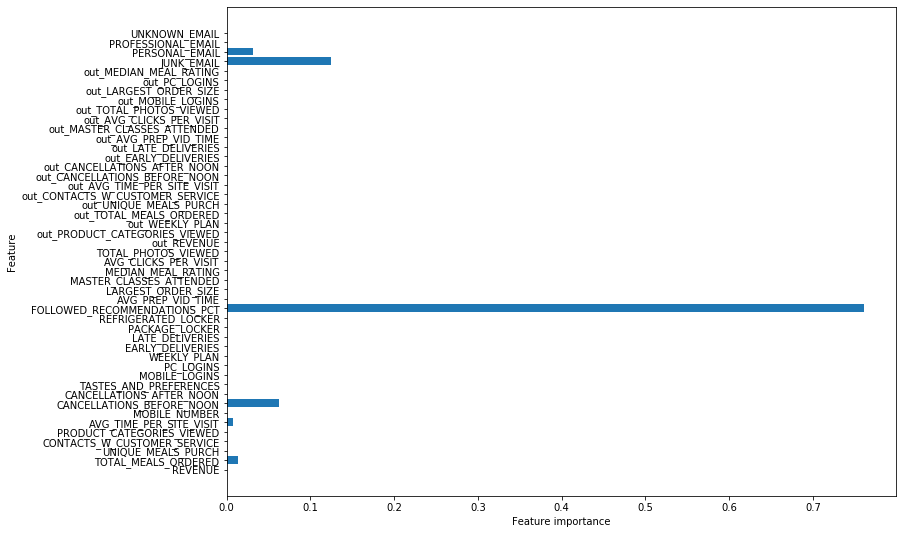

In [88]:
# plotting feature importance
plot_feature_importances(tree_pruned_fit,
                         train = X_train,
                         export = False)